In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [3]:
bike = pd.read_csv ("TEST.csv")

In [4]:
bike.head()

,wkday_ct,wkend_ct,TrafDir,BikeInfra,SegNum,StLength,Rd_Wd,Pop_Den,AMI,pct_CR,pct_IM,pct_M,pct_OS,pct_R,pct_U,Prox
0,139,120,0,0,30,10891,60,17.08,129806.0,0.03,0.12,0.15,0.04,0.24,0.42,5981
1,95,73,0,0,20,7364,60,9.05,117379.5,0.04,0.34,0.09,0.16,0.12,0.26,4549
2,24,12,0,0,9,2792,60,3.43,123250.0,0.29,0.01,0.28,0.00,0.00,0.41,2058
3,873,566,1,1,79,18112,75,8.00,33863.5,0.00,0.49,0.01,0.00,0.00,0.51,3854
4,1385,1303,1,0,145,24855,80,17.28,67085.0,0.57,0.00,0.10,0.00,0.01,0.33,1092


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = np.asarray(bike[['StLength','SegNum', 'Rd_Wd', 'BikeInfra']])
Y = np.asarray(bike['wkend_ct'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= False)

In [8]:
lineReg = LinearRegression()

In [9]:
lineReg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print('Intercept: ', lineReg.score(X, Y))
print('Coefficients: ', lineReg.coef_)

Intercept:  0.2652039725199513
Coefficients:  [-1.27712717e-02  3.78465817e+00 -1.14128970e+00  1.23204526e+02]


In [11]:
results = lineReg.fit(X_train, y_train)

In [12]:
lineReg.score(X_train,y_train)

0.4108795777759314

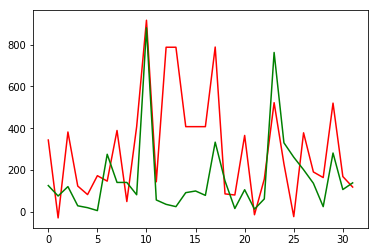

In [13]:
plt.plot(lineReg.predict(X_test), c= 'red', label = 'Predicted Counts' )
plt.plot(y_test, c= 'green')
plt.show()

In [14]:
print (lineReg.predict(X_test))

[343.25086988 -30.06907651 381.77938221 122.66120884  81.80091226
 172.33796572 146.30082176 389.05060753  48.45052637 407.38625919
 917.49137118 143.05461179 788.11734425 788.11734425 407.38625919
 407.38625919 407.38625919 789.0420035   85.07238193  79.78877536
 365.28123332 -14.8621297  155.93822807 522.37194963 229.06478675
 -23.9044689  377.84675566 190.25931034 163.4053871  520.19669493
 168.33810741 117.88553573]


# Ridge Regression

In [15]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = 0.05)


In [16]:
reg.fit(X_train, y_train)
print('Intercept: ', reg.score(X_test, y_test))
print('Coefficients: ', reg.coef_)


Intercept:  -0.9869031056550177
Coefficients:  [-1.81397039e-02  5.60139451e+00  4.05751981e-02  1.27659040e+02]


In [17]:
reg.score(X_train,y_train)

0.4108779983450351

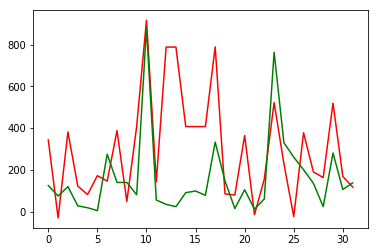

In [18]:
plt.plot(reg.predict(X_test), c= 'red', label = 'Predicted Counts')
plt.plot(y_test, c= 'green')
plt.show()

# Lasso Regression

In [19]:
from sklearn import linear_model
lasso = linear_model.Lasso (alpha = 0.05)


In [20]:
lasso.fit(X,Y)


Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
print('Intercept: ', lasso.score(X_test, y_test))
print('Coefficients: ', lasso.coef_)


Intercept:  0.09626671353042937
Coefficients:  [-1.27681406e-02  3.78409762e+00 -1.14091250e+00  1.22799113e+02]


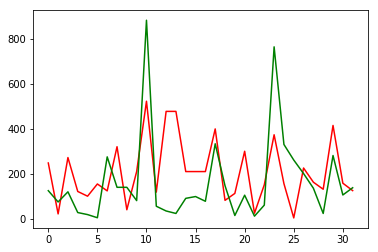

In [22]:
plt.plot(lasso.predict(X_test), c= 'red', label = 'Predicted Counts')
plt.plot(y_test, c= 'green')
plt.show()

In [23]:
lasso.score(X_train,y_train)

0.32656197615124405

# Checking with 1000 iterations

In [24]:
Intercept = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    Intercept.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(Intercept))
print(np.mean(coefs, axis=0))


Linear Regression
-0.07248664461529969
[-1.29018793e-02  3.83742448e+00 -1.18817544e+00  1.19915632e+02]


In [25]:

Intercept = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = 0.05)
    lineReg.fit(X_train, y_train)
    Intercept.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(Intercept))
print(np.mean(coefs, axis=0))


Ridge Regression
-0.04753489096351303
[-1.27621266e-02  3.80964072e+00 -1.16411859e+00  1.19581702e+02]
